In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import random
from sklearn.manifold import TSNE
import torch.optim as optim
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.manifold import TSNE

In [2]:
df_raw = pd.read_csv("annthyroid.csv", header=None)
print(df_raw)

            0   1   2   3   4   5   6   7   8   9   ...  12  13  14  15  \
0     0.750000   1   0   1   1   1   1   1   0   1  ...   1   1   1   1   
1     0.239583   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   
2     0.479167   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   
3     0.656250   0   1   1   1   1   1   1   1   1  ...   1   1   1   1   
4     0.229167   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   
...        ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..   
7085  0.604167   1   1   1   1   1   1   1   1   1  ...   1   1   1   0   
7086  0.520833   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   
7087  0.520833   1   1   1   1   1   1   1   1   1  ...   1   1   1   0   
7088  0.354167   0   1   1   1   1   1   1   1   1  ...   1   1   1   1   
7089  0.750000   1   1   1   1   1   1   1   1   1  ...   1   1   1   0   

            16        17        18        19        20  21  
0     0.001132  0.080780  0.197324  0.

In [3]:
y = df_raw.iloc[:,-1]
x = df_raw.iloc[:,0:-1]
x = (x - x.min()) / (x.max() - x.min()) #normalized x

#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=3)

y_train = pd.get_dummies(y_train)
df_train = pd.concat([x_train, y_train], axis =1)
df_train


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,-1,1
2705,0.791667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.005849,0.047354,0.172241,0.300926,0.198438,0,1
3197,0.770833,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.009623,0.119777,0.133779,0.282407,0.160937,0,1
3700,0.208333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.002830,0.109192,0.230769,0.555556,0.156250,0,1
6158,0.177083,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.011132,0.113092,0.152174,0.365741,0.148438,0,1
3430,0.770833,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.000623,0.097493,0.220736,0.370370,0.212500,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0.510417,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.002075,0.119777,0.132107,0.356481,0.131250,0,1
1667,0.427083,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.012830,0.064067,0.070234,0.324074,0.076562,1,0
3321,0.239583,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.004528,0.153203,0.200669,0.444444,0.167188,0,1
1688,0.802083,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.001679,0.097493,0.168896,0.375000,0.160937,0,1


In [4]:
# 1 greater than 4369 values than -1
# generate 4369 sample for -1

df_train_1 = df_train[df_train.iloc[:,-1]==1]
df_train_n1 = df_train[df_train.iloc[:,-2]==1]
diff_row = df_train_1.shape[0] - df_train_n1.shape[0]

print("df_train_1:", df_train_1.shape)
print("df_train_n1:", df_train_n1.shape)
print("diff:", diff_row)



df_train_1: (5898, 23)
df_train_n1: (483, 23)
diff: 5415


In [5]:

x = df_train_n1.iloc[:,:-2 ]
y = df_train_n1.iloc[:,-2: ]
print(y)

y = torch.Tensor(y.values)
x = torch.Tensor(x.values)

      -1   1
6371   1   0
1491   1   0
1295   1   0
105    1   0
4503   1   0
...   ..  ..
4604   1   0
1445   1   0
1789   1   0
5455   1   0
1667   1   0

[483 rows x 2 columns]


In [6]:
#Generate Data for minority class M

class VariationalAutoencoder(nn.Module):
    def __init__(self, num_features=10, num_dim=21):
        super(VariationalAutoencoder, self).__init__()
        
        self.num_features = num_features
        self.num_dim = num_dim
        
        self.encoder_layer_1 = nn.Linear(in_features=self.num_dim, out_features=10)
        self.encoder_layer_2 = nn.Linear(in_features=10, out_features=(self.num_features * 2))
        
        self.decoder_layer_1 = nn.Linear(in_features=self.num_features, out_features=10)
        self.decoder_layer_2 = nn.Linear(in_features=10, out_features=self.num_dim)
        
        self.relu = nn.ReLU() # hidden layers
        self.sigmoid = nn.Sigmoid() # output layer
        
    def reparameterize(self, mu, log_var):
        """
        :param mu: mean from the encoder's latent space
        :param log_var: log variance from the encoder's latent space
        """
        std = torch.exp(0.5*log_var) # standard deviation
        eps = torch.randn_like(std)  # `randn_like` as we need the same size
        sample = mu + (eps * std)    # sampling as if coming from the input space
        
        return sample
    
    def encode(self, x):
        # encoding
        #x = F.relu(self.encoder_layer_1(x))
        x = self.encoder_layer_1(x)
        x = self.relu(x)
        x = self.encoder_layer_2(x).view(-1, 2, self.num_features)
        
        # get `mu` and `log_var`
        mu = x[:, 0, :] # the first feature values as mean
        log_var = x[:, 1, :] # the other feature values as variance
        
        # get the latent vector through reparameterization
        z = self.reparameterize(mu, log_var)
        
        return z, mu, log_var
    
    def decode(self, z, mu, log_var):
        # decoding
        #x = F.relu(self.decoder_layer_1(z))
        x = self.decoder_layer_1(z)
        x = self.relu(x)
        
        #reconstruction = torch.sigmoid(self.decoder_layer_2(x))
        reconstruction = self.decoder_layer_2(x)
        reconstruction = self.sigmoid(reconstruction)
        
        return reconstruction, mu, log_var
    
    # Utility function to generate new data based on:
    # mu: The average that you want to have (should be the same size as num_features)
    # log_var: The variance that you want to have (should be the same size as num_features)
    def sample(self, mu, log_var):
        z = self.reparameterize(mu, log_var)
        reconstruction, mu, log_var = self.decode(z, mu, log_var)
        
        return reconstruction
        
    
    def forward(self, x):
        
        z, mu, log_var = self.encode(x)
        reconstruction, mu, log_var = self.decode(z, mu, log_var)
        
        return reconstruction, mu, log_var

In [7]:
# Custom dataset to treat how the model picks an x, y combination from the dataset
class AutoencoderDataset(Dataset):
    def __init__(self, x):
        self.x = x
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.x[index]

In [8]:
# The final loss is a combination of the reconstruction loss (first argument) and the loss from an assumed distribution (i.e. Normal / Gaussian distribution)
def final_loss(bce_loss, mu, logvar):
    """
    This function will add the reconstruction loss (BCELoss) and the 
    KL-Divergence.
    KL-Divergence = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    :param bce_loss: recontruction loss
    :param mu: the mean from the latent vector
    :param logvar: log variance from the latent vector
    """
    BCE = bce_loss 
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [9]:
num_features = 10
model = VariationalAutoencoder(num_features=num_features)

In [10]:
learning_rate = 0.0001
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 50

In [11]:
# Define the training process
# Each call of the train function == 1 Epoch
def train_fn(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        reconstruction, mu, logvar = model.forward(data)
        
        loss = loss_fn(reconstruction, targets)
        
        loss = final_loss(loss, mu, logvar)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

In [12]:
# use Dataloader for Autoencoder 
custom_dataset = AutoencoderDataset(x)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [13]:
epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_fn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
#     state = { 'state_dict': model.state_dict() }
#     torch.save(state, "magic04_model.pth")

Epoch: 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 264.74it/s, loss=36.8]


Ave Loss: 54.56108360290527
Epoch: 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 275.32it/s, loss=35.3]


Ave Loss: 52.2216854095459
Epoch: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 269.87it/s, loss=33.8]


Ave Loss: 50.00871620178223
Epoch: 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 256.18it/s, loss=32.4]


Ave Loss: 47.91598701477051
Epoch: 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 280.70it/s, loss=31.1]


Ave Loss: 45.94184608459473
Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 279.97it/s, loss=29.8]


Ave Loss: 44.08397445678711
Epoch: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 267.14it/s, loss=28.7]


Ave Loss: 42.33239040374756
Epoch: 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 265.07it/s, loss=27.6]


Ave Loss: 40.68020229339599
Epoch: 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 256.12it/s, loss=26.5]


Ave Loss: 39.122765731811526
Epoch: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 246.54it/s, loss=25.5]


Ave Loss: 37.6489917755127
Epoch: 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 255.10it/s, loss=24.6]


Ave Loss: 36.253165054321286
Epoch: 11


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 266.17it/s, loss=23.7]


Ave Loss: 34.92663097381592
Epoch: 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 255.90it/s, loss=22.9]


Ave Loss: 33.672053527832034
Epoch: 13


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 275.05it/s, loss=22.1]


Ave Loss: 32.47375087738037
Epoch: 14


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 257.56it/s, loss=21.3]


Ave Loss: 31.33335647583008
Epoch: 15


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 257.67it/s, loss=20.6]


Ave Loss: 30.2482421875
Epoch: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 267.90it/s, loss=19.9]


Ave Loss: 29.214082145690917
Epoch: 17


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 264.38it/s, loss=19.2]


Ave Loss: 28.22477970123291
Epoch: 18


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 239.54it/s, loss=18.6]


Ave Loss: 27.281613922119142
Epoch: 19


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 241.60it/s, loss=18]


Ave Loss: 26.380028915405273
Epoch: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 296.86it/s, loss=17.4]


Ave Loss: 25.51595993041992
Epoch: 21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 299.26it/s, loss=16.8]


Ave Loss: 24.692773246765135
Epoch: 22


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 305.91it/s, loss=16.3]


Ave Loss: 23.905089950561525
Epoch: 23


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 297.06it/s, loss=15.8]


Ave Loss: 23.14955587387085
Epoch: 24


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 261.98it/s, loss=15.3]


Ave Loss: 22.427374649047852
Epoch: 25


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 297.46it/s, loss=14.8]


Ave Loss: 21.73399591445923
Epoch: 26


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 301.84it/s, loss=14.4]


Ave Loss: 21.070934677124022
Epoch: 27


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 300.92it/s, loss=14]


Ave Loss: 20.436839008331297
Epoch: 28


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 306.28it/s, loss=13.6]


Ave Loss: 19.827708435058593
Epoch: 29


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 309.84it/s, loss=13.2]


Ave Loss: 19.241677665710448
Epoch: 30


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 288.68it/s, loss=12.8]


Ave Loss: 18.677292823791504
Epoch: 31


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 288.09it/s, loss=12.4]


Ave Loss: 18.141155910491943
Epoch: 32


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 317.59it/s, loss=12.1]


Ave Loss: 17.619058990478514
Epoch: 33


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 295.47it/s, loss=11.7]


Ave Loss: 17.12287187576294
Epoch: 34


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 302.32it/s, loss=11.4]


Ave Loss: 16.64308633804321
Epoch: 35


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 288.65it/s, loss=11.1]


Ave Loss: 16.18383083343506
Epoch: 36


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 303.85it/s, loss=10.8]


Ave Loss: 15.74049129486084
Epoch: 37


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 288.03it/s, loss=10.5]


Ave Loss: 15.314061641693115
Epoch: 38


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 295.97it/s, loss=10.3]


Ave Loss: 14.901838779449463
Epoch: 39


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 307.06it/s, loss=9.99]


Ave Loss: 14.506710433959961
Epoch: 40


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 300.15it/s, loss=9.74]


Ave Loss: 14.126503658294677
Epoch: 41


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 300.65it/s, loss=9.48]


Ave Loss: 13.757223796844482
Epoch: 42


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 293.33it/s, loss=9.25]


Ave Loss: 13.406254196166993
Epoch: 43


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 287.91it/s, loss=9.02]


Ave Loss: 13.062485694885254
Epoch: 44


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 304.69it/s, loss=8.79]


Ave Loss: 12.732380199432374
Epoch: 45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 303.15it/s, loss=8.59]


Ave Loss: 12.414547634124755
Epoch: 46


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 295.52it/s, loss=8.36]


Ave Loss: 12.101485633850098
Epoch: 47


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 307.89it/s, loss=8.17]


Ave Loss: 11.808019351959228
Epoch: 48


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 306.24it/s, loss=7.96]


Ave Loss: 11.52016053199768
Epoch: 49


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 309.61it/s, loss=7.78]


Ave Loss: 11.24123511314392
Epoch: 50


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 297.95it/s, loss=7.6]


Ave Loss: 10.96996521949768
Epoch: 51


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 283.63it/s, loss=7.42]


Ave Loss: 10.713357830047608
Epoch: 52


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 314.55it/s, loss=7.26]


Ave Loss: 10.461459064483643
Epoch: 53


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 296.15it/s, loss=7.1]


Ave Loss: 10.217546081542968
Epoch: 54


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 287.55it/s, loss=6.92]


Ave Loss: 9.97910680770874
Epoch: 55


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 287.58it/s, loss=6.77]


Ave Loss: 9.749806690216065
Epoch: 56


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 273.22it/s, loss=6.63]


Ave Loss: 9.528992700576783
Epoch: 57


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 301.02it/s, loss=6.47]


Ave Loss: 9.310089302062988
Epoch: 58


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 293.70it/s, loss=6.35]


Ave Loss: 9.10316891670227
Epoch: 59


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 301.96it/s, loss=6.2]


Ave Loss: 8.898908329010009
Epoch: 60


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 278.86it/s, loss=6.06]


Ave Loss: 8.699509048461914
Epoch: 61


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 297.26it/s, loss=5.95]


Ave Loss: 8.509232378005981
Epoch: 62


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 288.08it/s, loss=5.81]


Ave Loss: 8.325460767745971
Epoch: 63


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 295.41it/s, loss=5.68]


Ave Loss: 8.143317365646363
Epoch: 64


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 279.97it/s, loss=5.58]


Ave Loss: 7.971220779418945
Epoch: 65


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 299.26it/s, loss=5.45]


Ave Loss: 7.7954339504241945
Epoch: 66


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 286.00it/s, loss=5.34]


Ave Loss: 7.633766174316406
Epoch: 67


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 302.63it/s, loss=5.23]


Ave Loss: 7.4654953956604
Epoch: 68


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 299.30it/s, loss=5.12]


Ave Loss: 7.3125176429748535
Epoch: 69


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 287.50it/s, loss=5.03]


Ave Loss: 7.159940576553344
Epoch: 70


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 296.52it/s, loss=4.93]


Ave Loss: 7.007344961166382
Epoch: 71


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 300.22it/s, loss=4.82]


Ave Loss: 6.864143228530883
Epoch: 72


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 280.85it/s, loss=4.74]


Ave Loss: 6.724571323394775
Epoch: 73


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 291.09it/s, loss=4.65]


Ave Loss: 6.586801671981812
Epoch: 74


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 299.35it/s, loss=4.55]


Ave Loss: 6.450211429595948
Epoch: 75


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 273.36it/s, loss=4.46]


Ave Loss: 6.318982267379761
Epoch: 76


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 286.51it/s, loss=4.38]


Ave Loss: 6.189863443374634
Epoch: 77


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 294.90it/s, loss=4.29]


Ave Loss: 6.066953897476196
Epoch: 78


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 285.08it/s, loss=4.22]


Ave Loss: 5.9465078830719
Epoch: 79


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 275.13it/s, loss=4.12]


Ave Loss: 5.827705955505371
Epoch: 80


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 285.94it/s, loss=4.06]


Ave Loss: 5.716674757003784
Epoch: 81


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 297.09it/s, loss=3.98]


Ave Loss: 5.5998156547546385
Epoch: 82


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 287.64it/s, loss=3.9]


Ave Loss: 5.486490058898926
Epoch: 83


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 302.78it/s, loss=3.82]


Ave Loss: 5.38161416053772
Epoch: 84


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 285.36it/s, loss=3.75]


Ave Loss: 5.279357671737671
Epoch: 85


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 292.85it/s, loss=3.7]


Ave Loss: 5.175361275672913
Epoch: 86


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 293.06it/s, loss=3.62]


Ave Loss: 5.077135467529297
Epoch: 87


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 274.81it/s, loss=3.56]


Ave Loss: 4.976835918426514
Epoch: 88


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 303.11it/s, loss=3.47]


Ave Loss: 4.87968761920929
Epoch: 89


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 298.19it/s, loss=3.42]


Ave Loss: 4.786513996124268
Epoch: 90


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 317.43it/s, loss=3.36]


Ave Loss: 4.692718768119812
Epoch: 91


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 255.75it/s, loss=3.29]


Ave Loss: 4.604888153076172
Epoch: 92


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 288.59it/s, loss=3.23]


Ave Loss: 4.516237568855286
Epoch: 93


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 277.66it/s, loss=3.18]


Ave Loss: 4.429465103149414
Epoch: 94


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 306.05it/s, loss=3.1]


Ave Loss: 4.343740224838257
Epoch: 95


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 297.57it/s, loss=3.06]


Ave Loss: 4.2648638725280765
Epoch: 96


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 306.30it/s, loss=2.99]


Ave Loss: 4.178500771522522
Epoch: 97


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 303.89it/s, loss=2.95]


Ave Loss: 4.10370397567749
Epoch: 98


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 276.73it/s, loss=2.89]


Ave Loss: 4.0247520208358765
Epoch: 99


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 294.57it/s, loss=2.85]

Ave Loss: 3.9558126449584963


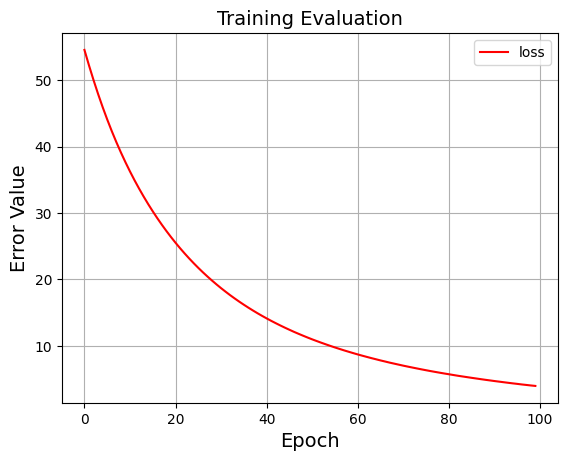

In [14]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [15]:
# Create a vector of zero tensors representing 0 average per num_feature (right in the middle of the dist)
sampled_mu = torch.Tensor([np.zeros(num_features)])

# Create a vector of zero tensors representing 0 standard deviations away from the mean to create variations
# Change this is you want to sample away from the mean to create "off-quality" data
sampled_logvar = torch.Tensor([np.zeros(num_features)])

print(sampled_logvar)

sampled_logvar.shape

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


C:\Users\wmagampoadmin\AppData\Local\Temp\ipykernel_16904\563129376.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:233.)
  sampled_mu = torch.Tensor([np.zeros(num_features)])


torch.Size([1, 10])

In [16]:
reconstruction = model.sample(sampled_mu, sampled_logvar)
reconstructed_data = reconstruction[0].detach().cpu().numpy()

In [17]:
reconstructed_sample = []
added_y = []

for i in range(diff_row):
    reconstruction = model.sample(sampled_mu, sampled_logvar)
    reconstructed_sample.append(reconstruction[0].detach().cpu().numpy())
    added_y.append([1,0])
    #print (reconstruction[0].detach().cpu().numpy())
    
    
# print(added_y)
print(reconstructed_sample)

[array([0.42518985, 0.5991856 , 0.6436165 , 0.52454126, 0.6296748 ,
       0.56331974, 0.5535621 , 0.52050364, 0.65530115, 0.59683734,
       0.6857361 , 0.69486344, 0.68452793, 0.76627964, 0.682682  ,
       0.4991687 , 0.39783275, 0.47408614, 0.31154153, 0.46147522,
       0.3565264 ], dtype=float32), array([0.5102861 , 0.6081999 , 0.5706071 , 0.62804943, 0.50188625,
       0.48972115, 0.54641664, 0.603379  , 0.56608176, 0.57686824,
       0.60317767, 0.6466232 , 0.59716284, 0.57598484, 0.6246179 ,
       0.53368837, 0.39532766, 0.46358874, 0.474808  , 0.44570744,
       0.57221967], dtype=float32), array([0.5219152 , 0.5785875 , 0.51933336, 0.623839  , 0.516065  ,
       0.421966  , 0.5881521 , 0.6159922 , 0.5049195 , 0.5938422 ,
       0.6018934 , 0.55089927, 0.5757329 , 0.5941563 , 0.6786292 ,
       0.5672967 , 0.44901434, 0.35749832, 0.39687195, 0.55974054,
       0.5534108 ], dtype=float32), array([0.7033684 , 0.5899399 , 0.8050796 , 0.80910134, 0.623222  ,
       0.48522228, 0

In [18]:
x = df_train_n1.iloc[:,:-2 ]
y = df_train_n1.iloc[:,-2: ]


columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
df_reconstructed_sample = pd.DataFrame(reconstructed_sample) # Making the reconstructed output as dataframe
#print(df_reconstructed_sample) 
#print(x)

# synching the column names for each df
df_reconstructed_sample.columns = columns 
x.columns = columns

# ==================================
# Generate fabricated data set
# ==================================
fab_x = x.append(df_reconstructed_sample, ignore_index=True) # Append x + constructed data
print(fab_x)

# 285 columns

fab_y = pd.DataFrame(added_y, columns=[-1, 1])
fab_y = y.append(fab_y, ignore_index=True)
print(fab_y)

print(fab_x.shape)
print(fab_y.shape)

            0         1         2         3         4         5         6   \
0     0.822917  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.520833  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2     0.666667  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3     0.333333  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4     0.468750  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
...        ...       ...       ...       ...       ...       ...       ...   
5893  0.532471  0.598736  0.551505  0.648466  0.510324  0.439345  0.520896   
5894  0.472604  0.596665  0.516379  0.579657  0.535329  0.525067  0.474295   
5895  0.604218  0.589323  0.639498  0.739338  0.545321  0.437697  0.588041   
5896  0.726294  0.689453  0.771127  0.802540  0.557342  0.497251  0.673925   
5897  0.423125  0.594284  0.540149  0.518244  0.576757  0.569331  0.488261   

            7         8         9   ...        11        12    

C:\Users\wmagampoadmin\AppData\Local\Temp\ipykernel_16904\2818054523.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fab_x = x.append(df_reconstructed_sample, ignore_index=True) # Append x + constructed data
C:\Users\wmagampoadmin\AppData\Local\Temp\ipykernel_16904\2818054523.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fab_y = y.append(fab_y, ignore_index=True)


### Train Neural Network using fab data

In [19]:
fab_y = torch.Tensor(fab_y.values)
fab_x = torch.Tensor(fab_x.values)


class NeuralNetwork(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.hidden_layer_1 = nn.Linear(self.in_dim, 10) # input to first hidden layer                        
        self.hidden_layer_2 = nn.Linear(10, 5) # input to first hidden layer                        
        
        self.output_layer = nn.Linear(5, self.out_dim)
        self.activation = nn.Sigmoid()
    
    def forward(self, x):
        x = self.hidden_layer_1(x)
        x = self.activation(x)        
        
        x = self.hidden_layer_2(x)
        x = self.activation(x)        
        
        y = self.output_layer(x)
        y = self.activation(y)
        
        return y

In [20]:
model = NeuralNetwork(21, 2)

# Test structure of model
predictions = model.forward(fab_x)

In [21]:
learning_rate = 0.00001

loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 20

In [22]:
# Custom dataset to treat how the model picks an x, y combination from the dataset
class MyCustomDataset_2(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [23]:
def train_fn_2(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        predictions = model.forward(data)
        
        loss = loss_fn(predictions, targets)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

# Dataloader is in charge of:
# - partitioning data into batches
# - optionally shuffling the data
# - run the optimizer against a partition defined by this loader
custom_dataset = MyCustomDataset_2(x=fab_x, y=fab_y)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_fn_2(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    torch.save(state, "annthyroid_model.pth")

Epoch: 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 422.80it/s, loss=0.187]


Ave Loss: 0.18874255827927994
Epoch: 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 416.77it/s, loss=0.185]


Ave Loss: 0.1859984358993627
Epoch: 2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 368.82it/s, loss=0.182]


Ave Loss: 0.1832835927858191
Epoch: 3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 364.66it/s, loss=0.179]


Ave Loss: 0.1805966583348937
Epoch: 4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 365.71it/s, loss=0.177]


Ave Loss: 0.17793569196078737
Epoch: 5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 364.41it/s, loss=0.174]


Ave Loss: 0.1752985115273524
Epoch: 6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 365.92it/s, loss=0.171]


Ave Loss: 0.17268187651189706
Epoch: 7


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 366.19it/s, loss=0.169]


Ave Loss: 0.1700823327242318
Epoch: 8


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 374.23it/s, loss=0.166]


Ave Loss: 0.1674972391229565
Epoch: 9


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 367.56it/s, loss=0.164]


Ave Loss: 0.16492553883689945
Epoch: 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 372.71it/s, loss=0.161]


Ave Loss: 0.16236681917966422
Epoch: 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 368.35it/s, loss=0.159]


Ave Loss: 0.15982004212120832
Epoch: 12


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 372.28it/s, loss=0.156]


Ave Loss: 0.15728367637779753
Epoch: 13


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 366.06it/s, loss=0.154]


Ave Loss: 0.15475642534635833
Epoch: 14


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 375.09it/s, loss=0.151]


Ave Loss: 0.15223809036157898
Epoch: 15


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 371.15it/s, loss=0.149]


Ave Loss: 0.14973057164984235
Epoch: 16


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 368.17it/s, loss=0.146]


Ave Loss: 0.1472349371950505
Epoch: 17


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 370.73it/s, loss=0.144]


Ave Loss: 0.1447527718746056
Epoch: 18


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 352.95it/s, loss=0.141]


Ave Loss: 0.1422856097504244
Epoch: 19


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 379.81it/s, loss=0.139]


Ave Loss: 0.13983556067539474
Epoch: 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 410.46it/s, loss=0.136]


Ave Loss: 0.13740348245127726
Epoch: 21


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 406.21it/s, loss=0.134]


Ave Loss: 0.1349900003206932
Epoch: 22


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 405.09it/s, loss=0.131]


Ave Loss: 0.13259635845483358
Epoch: 23


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 404.14it/s, loss=0.129]


Ave Loss: 0.13022353805727876
Epoch: 24


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 397.91it/s, loss=0.127]


Ave Loss: 0.12787277476262238
Epoch: 25


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 410.24it/s, loss=0.124]


Ave Loss: 0.12554414582959675
Epoch: 26


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 407.38it/s, loss=0.122]


Ave Loss: 0.12323851353031094
Epoch: 27


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 404.94it/s, loss=0.12]


Ave Loss: 0.12095640973519471
Epoch: 28


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 405.32it/s, loss=0.118]


Ave Loss: 0.11869888065730111
Epoch: 29


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 403.87it/s, loss=0.115]


Ave Loss: 0.1164663216572697
Epoch: 30


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 395.75it/s, loss=0.113]


Ave Loss: 0.11425873473034066
Epoch: 31


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 404.80it/s, loss=0.111]


Ave Loss: 0.11207642269841696
Epoch: 32


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 402.73it/s, loss=0.109]


Ave Loss: 0.10991970760337377
Epoch: 33


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 400.56it/s, loss=0.107]


Ave Loss: 0.10778895846362842
Epoch: 34


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 403.69it/s, loss=0.105]


Ave Loss: 0.10568474000793393
Epoch: 35


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 409.46it/s, loss=0.103]


Ave Loss: 0.10360675161167726
Epoch: 36


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 407.39it/s, loss=0.101]


Ave Loss: 0.10155544935141579
Epoch: 37


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 403.90it/s, loss=0.0986]


Ave Loss: 0.09953128187838248
Epoch: 38


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 409.27it/s, loss=0.0966]


Ave Loss: 0.09753508148557048
Epoch: 39


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 401.26it/s, loss=0.0946]


Ave Loss: 0.09556711197404538
Epoch: 40


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 403.29it/s, loss=0.0927]


Ave Loss: 0.09362698177159842
Epoch: 41


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 405.83it/s, loss=0.0908]


Ave Loss: 0.09171516670513961
Epoch: 42


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 407.49it/s, loss=0.089]


Ave Loss: 0.08983195487220409
Epoch: 43


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 401.60it/s, loss=0.0871]


Ave Loss: 0.08797801076355627
Epoch: 44


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 407.99it/s, loss=0.0853]


Ave Loss: 0.0861526641300169
Epoch: 45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 404.18it/s, loss=0.0835]


Ave Loss: 0.0843559499514305
Epoch: 46


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 406.36it/s, loss=0.0818]


Ave Loss: 0.08258789669154054
Epoch: 47


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 401.93it/s, loss=0.08]


Ave Loss: 0.08084910774635057
Epoch: 48


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 405.21it/s, loss=0.0783]


Ave Loss: 0.07913924299054227
Epoch: 49


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 402.40it/s, loss=0.0767]


Ave Loss: 0.07745802637379048
Epoch: 50


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 357.30it/s, loss=0.075]


Ave Loss: 0.07580534101037656
Epoch: 51


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 384.20it/s, loss=0.0734]


Ave Loss: 0.07418116828647711
Epoch: 52


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 401.70it/s, loss=0.0718]


Ave Loss: 0.07258574174622358
Epoch: 53


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 403.16it/s, loss=0.0703]


Ave Loss: 0.07101824897325645
Epoch: 54


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 378.16it/s, loss=0.0688]


Ave Loss: 0.06947887484299935
Epoch: 55


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 401.67it/s, loss=0.0673]


Ave Loss: 0.06796734439114392
Epoch: 56


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 398.00it/s, loss=0.0658]


Ave Loss: 0.0664836645884029
Epoch: 57


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 402.52it/s, loss=0.0644]


Ave Loss: 0.06502745209609048
Epoch: 58


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 403.58it/s, loss=0.0629]


Ave Loss: 0.06359830544156543
Epoch: 59


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 400.10it/s, loss=0.0615]


Ave Loss: 0.06219593385013483
Epoch: 60


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 403.48it/s, loss=0.0602]


Ave Loss: 0.06081989565390652
Epoch: 61


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 399.38it/s, loss=0.0588]


Ave Loss: 0.05947045404779709
Epoch: 62


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 400.12it/s, loss=0.0575]


Ave Loss: 0.05814709328746392
Epoch: 63


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 401.36it/s, loss=0.0562]


Ave Loss: 0.05684921045677137
Epoch: 64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 406.08it/s, loss=0.055]


Ave Loss: 0.055576535112271876
Epoch: 65


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 398.50it/s, loss=0.0537]


Ave Loss: 0.05432857363405874
Epoch: 66


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 404.88it/s, loss=0.0525]


Ave Loss: 0.05310539018552182
Epoch: 67


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 402.94it/s, loss=0.0513]


Ave Loss: 0.05190658193018477
Epoch: 68


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 400.15it/s, loss=0.0502]


Ave Loss: 0.0507312988578263
Epoch: 69


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 402.76it/s, loss=0.049]


Ave Loss: 0.049579389544866855
Epoch: 70


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 402.10it/s, loss=0.0479]


Ave Loss: 0.04845040747422283
Epoch: 71


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 391.39it/s, loss=0.0468]


Ave Loss: 0.04734419075361753
Epoch: 72


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 402.63it/s, loss=0.0458]


Ave Loss: 0.04626069130786395
Epoch: 73


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 395.11it/s, loss=0.0447]


Ave Loss: 0.04519900467436192
Epoch: 74


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 403.86it/s, loss=0.0437]


Ave Loss: 0.04415883267835035
Epoch: 75


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 403.55it/s, loss=0.0427]


Ave Loss: 0.043139848883374264
Epoch: 76


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 394.58it/s, loss=0.0417]


Ave Loss: 0.04214156518800784
Epoch: 77


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 395.57it/s, loss=0.0407]


Ave Loss: 0.041163518342931395
Epoch: 78


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 397.57it/s, loss=0.0398]


Ave Loss: 0.04020510765455537
Epoch: 79


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 394.71it/s, loss=0.0388]


Ave Loss: 0.039265295080209185
Epoch: 80


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 387.29it/s, loss=0.0379]


Ave Loss: 0.03834343183848817
Epoch: 81


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 397.25it/s, loss=0.037]


Ave Loss: 0.03743915584380344
Epoch: 82


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 395.69it/s, loss=0.0361]


Ave Loss: 0.03655203335871131
Epoch: 83


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 390.84it/s, loss=0.0353]


Ave Loss: 0.035681620467517335
Epoch: 84


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 393.15it/s, loss=0.0344]


Ave Loss: 0.034827921893131934
Epoch: 85


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 394.28it/s, loss=0.0336]


Ave Loss: 0.03399073580058955
Epoch: 86


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 391.56it/s, loss=0.0328]


Ave Loss: 0.03317018325551081
Epoch: 87


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 395.17it/s, loss=0.032]


Ave Loss: 0.032366068017179686
Epoch: 88


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 394.35it/s, loss=0.0312]


Ave Loss: 0.031577961437277875
Epoch: 89


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 386.07it/s, loss=0.0304]


Ave Loss: 0.03080571845047555
Epoch: 90


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 393.83it/s, loss=0.0297]


Ave Loss: 0.030049433407642073
Epoch: 91


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 391.16it/s, loss=0.029]


Ave Loss: 0.029308725078984844
Epoch: 92


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 392.71it/s, loss=0.0282]


Ave Loss: 0.02858315917142367
Epoch: 93


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 393.13it/s, loss=0.0275]


Ave Loss: 0.027872673384213852
Epoch: 94


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 385.82it/s, loss=0.0268]


Ave Loss: 0.02717696034302146
Epoch: 95


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 392.83it/s, loss=0.0262]


Ave Loss: 0.02649589763101885
Epoch: 96


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 394.42it/s, loss=0.0255]


Ave Loss: 0.02582914487032567
Epoch: 97


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 392.45it/s, loss=0.0249]


Ave Loss: 0.025176469129273446
Epoch: 98


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 394.21it/s, loss=0.0242]


Ave Loss: 0.02453752936069238
Epoch: 99


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 392.00it/s, loss=0.0236]

Ave Loss: 0.023912188057172098


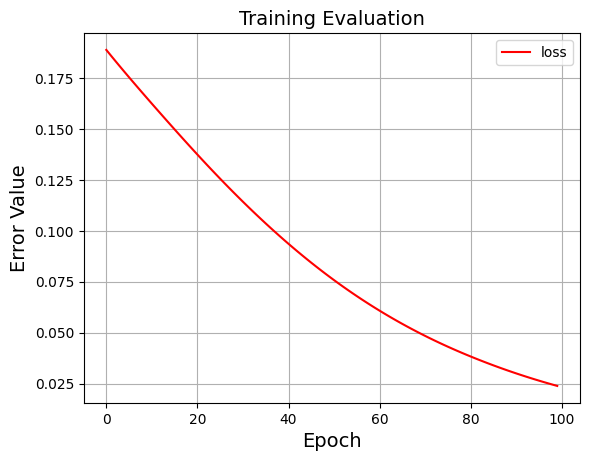

In [24]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [25]:
y_test = pd.get_dummies(y_test)
# y_test = torch.Tensor(y_test.values)
x_test = torch.Tensor(x_test.values)

model = NeuralNetwork(21, 2)

predictions = model.forward(x_test)
preds = predictions.detach().cpu().numpy()

ohe = []
for i in preds:
       if i[0] > i[1]:
         ohe.append([1,0])
       else:
        ohe.append([0,1])
#preds
ohe

acc = accuracy_score(ohe, y_test)
cl_report = classification_report(ohe, y_test)
print("acc: ", acc)
print("cl report: ", cl_report)

acc:  0.06205923836389281
cl report:                precision    recall  f1-score   support

           0       1.00      0.06      0.12       709
           1       0.00      0.00      0.00         0

   micro avg       0.06      0.06      0.06       709
   macro avg       0.50      0.03      0.06       709
weighted avg       1.00      0.06      0.12       709
 samples avg       0.06      0.06      0.06       709



D:\Data Engineering Class\NeuralNetwork_contest\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
